<a href="https://colab.research.google.com/github/elyorakhmat/ML_journey/blob/main/customer_churn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer churn: the loss of customers.
## The purpose is to develop a model that can effectively predict (customer churn) whether a customer is lost.

### Tasks:
1. To load and analyse the data.
2. To make data preprocessing: handling NaN values, duplicates.
3. To prepare for ML: encoding; scaling; feature and label extraction; and train-test splitting.
4. Model development.
5. Model evaluation.

### The classification algorithms:
1. Logistic Regression.
2. Decision Tree.
3. Random Forest.
4. Support Vector Machine (SVM).
5. XGBoost.

# Libraries

In [ ]:
# libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dataset loading

In [ ]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.shape

(5630, 20)

In [ ]:
# descriptions of the columns
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[2,3])
description

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


# Dataset analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# There are NaN values.

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
# Standardization is required to some columns.

In [ ]:
# I am confused about 'PreferredLoginDevice' values: Mobile phone and Phone.
# They are the same in the context of online shopping.
df['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,2765
Computer,1634
Phone,1231


In [ ]:
pd.crosstab(df['PreferredLoginDevice'], df['Churn'], normalize='index')

Churn,0,1
PreferredLoginDevice,,
Computer,0.801714,0.198286
Mobile Phone,0.874141,0.125859
Phone,0.775792,0.224208


In [ ]:
# But, they seem different according to the analysis above.

# Data Preprocessing

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3,Laptop & Accessory,2,Single,9,1,5.0,159.93
1,1,10.213917,Phone,1,8.0,UPI,Male,4,Mobile,3,Single,7,1,0.0,120.90
2,1,10.213917,Phone,1,30.0,Debit Card,Male,4,Mobile,3,Single,6,1,3.0,120.28
3,1,0.000000,Phone,3,15.0,Debit Card,Male,4,Laptop & Accessory,5,Single,8,0,3.0,134.07
4,1,0.000000,Phone,1,12.0,CC,Male,3,Mobile,5,Single,3,0,3.0,129.60


In [ ]:
# We don't need CustomerID column.
# So, drop!
df.drop('CustomerID', axis=1, inplace= True)

## Fixing duplicate values

In [ ]:
# checking duplicates
print('The dataset includes', df.duplicated().sum(), 'duplicate values.')
print((df.duplicated().sum() / len(df) * 100).round(), 'percent values are duplicate.')

The dataset includes 556 duplicate values.
10.0 percent values are duplicate.


In [ ]:
# droping duplicate values
df.drop_duplicates(keep= 'first', inplace= True)

## Handling NaN values

In [ ]:
# handling NaN values
df.isna().sum().sort_values(ascending= False)

,0
DaySinceLastOrder,288
OrderAmountHikeFromlastYear,252
OrderCount,243
Tenure,231
HourSpendOnApp,230
WarehouseToHome,221
CouponUsed,210
PreferredLoginDevice,0
Churn,0
PreferredPaymentMode,0


In [ ]:
print(((df.isna().any(axis= 1).sum()) / len(df) * 100).round(), 'percent row values are NaN values')
print(f"{df.isna().any(axis= 1).sum()} row values out of {len(df)} are NaN values.")

33.0 percent row values are NaN values
1675 row values out of 5074 are NaN values.


In [ ]:
# 33 % is too high to drop.
# We can check correlations
df_corr = df.corrwith(df['Churn'], numeric_only= True).abs().sort_values(ascending= False)
df_corr

,0
Churn,1.000000
Tenure,0.342394
Complain,0.248738
DaySinceLastOrder,0.151925
CashbackAmount,0.143181
NumberOfDeviceRegistered,0.116788
SatisfactionScore,0.100867
CityTier,0.098159
WarehouseToHome,0.072966
NumberOfAddress,0.052086


In [ ]:
# We can drop columns with correlation with the target column below than 0.02
low_corr_cols = df_corr[df_corr < 0.03].index.to_numpy()

df.drop(columns= low_corr_cols, inplace= True)

In [ ]:
df.isna().sum().sort_values(ascending= False)

,0
DaySinceLastOrder,288
Tenure,231
WarehouseToHome,221
PreferredLoginDevice,0
CityTier,0
PreferredPaymentMode,0
Churn,0
Gender,0
NumberOfDeviceRegistered,0
SatisfactionScore,0


In [ ]:
print(f"Now, {df.isna().any(axis=1).sum()} row values out of {len(df)} are NaN.")
print((df.isna().any(axis= 1).sum() / len(df) *100).round(), '% row values are NaN.')

Now, 740 row values out of 5074 are NaN.
15.0 % row values are NaN.


In [ ]:
# filling the NaN values in 'Tenure' column, as Tenure column has the highest correlation.
df['Tenure'].fillna(df['Tenure'].mean(), inplace= True)

/tmp/ipython-input-20-861433695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].fillna(df['Tenure'].mean(), inplace= True)


In [ ]:
df.isna().sum().sort_values(ascending= False)

,0
DaySinceLastOrder,288
WarehouseToHome,221
Tenure,0
PreferredLoginDevice,0
CityTier,0
PreferredPaymentMode,0
Churn,0
Gender,0
NumberOfDeviceRegistered,0
SatisfactionScore,0


In [ ]:
print(f"Now, {df.isna().any(axis=1).sum()} row values out of {len(df)} are NaN.")
print((df.isna().any(axis= 1).sum() / len(df) *100).round(), '% row values are NaN.')

Now, 509 row values out of 5074 are NaN.
10.0 % row values are NaN.


In [ ]:
# drop the all resting NaN values
df.dropna(inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4565 entries, 0 to 5629
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     4565 non-null   int64  
 1   Tenure                    4565 non-null   float64
 2   PreferredLoginDevice      4565 non-null   object 
 3   CityTier                  4565 non-null   int64  
 4   WarehouseToHome           4565 non-null   float64
 5   PreferredPaymentMode      4565 non-null   object 
 6   Gender                    4565 non-null   object 
 7   NumberOfDeviceRegistered  4565 non-null   int64  
 8   PreferedOrderCat          4565 non-null   object 
 9   SatisfactionScore         4565 non-null   int64  
 10  MaritalStatus             4565 non-null   object 
 11  NumberOfAddress           4565 non-null   int64  
 12  Complain                  4565 non-null   int64  
 13  DaySinceLastOrder         4565 non-null   float64
 14  CashbackAmoun

In [ ]:
# checking duplicates again!
print('Now,', df.duplicated().sum(), 'duplicate values exist.')
print((df.duplicated().sum() / len(df) * 100).round(), 'percent values are duplicate.')

Now, 671 duplicate values exist.
15.0 percent values are duplicate.


In [ ]:
df.drop_duplicates(keep= 'first', inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3894 entries, 0 to 5618
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     3894 non-null   int64  
 1   Tenure                    3894 non-null   float64
 2   PreferredLoginDevice      3894 non-null   object 
 3   CityTier                  3894 non-null   int64  
 4   WarehouseToHome           3894 non-null   float64
 5   PreferredPaymentMode      3894 non-null   object 
 6   Gender                    3894 non-null   object 
 7   NumberOfDeviceRegistered  3894 non-null   int64  
 8   PreferedOrderCat          3894 non-null   object 
 9   SatisfactionScore         3894 non-null   int64  
 10  MaritalStatus             3894 non-null   object 
 11  NumberOfAddress           3894 non-null   int64  
 12  Complain                  3894 non-null   int64  
 13  DaySinceLastOrder         3894 non-null   float64
 14  CashbackAmoun

## Visual analysis

<Figure size 1200x600 with 0 Axes>

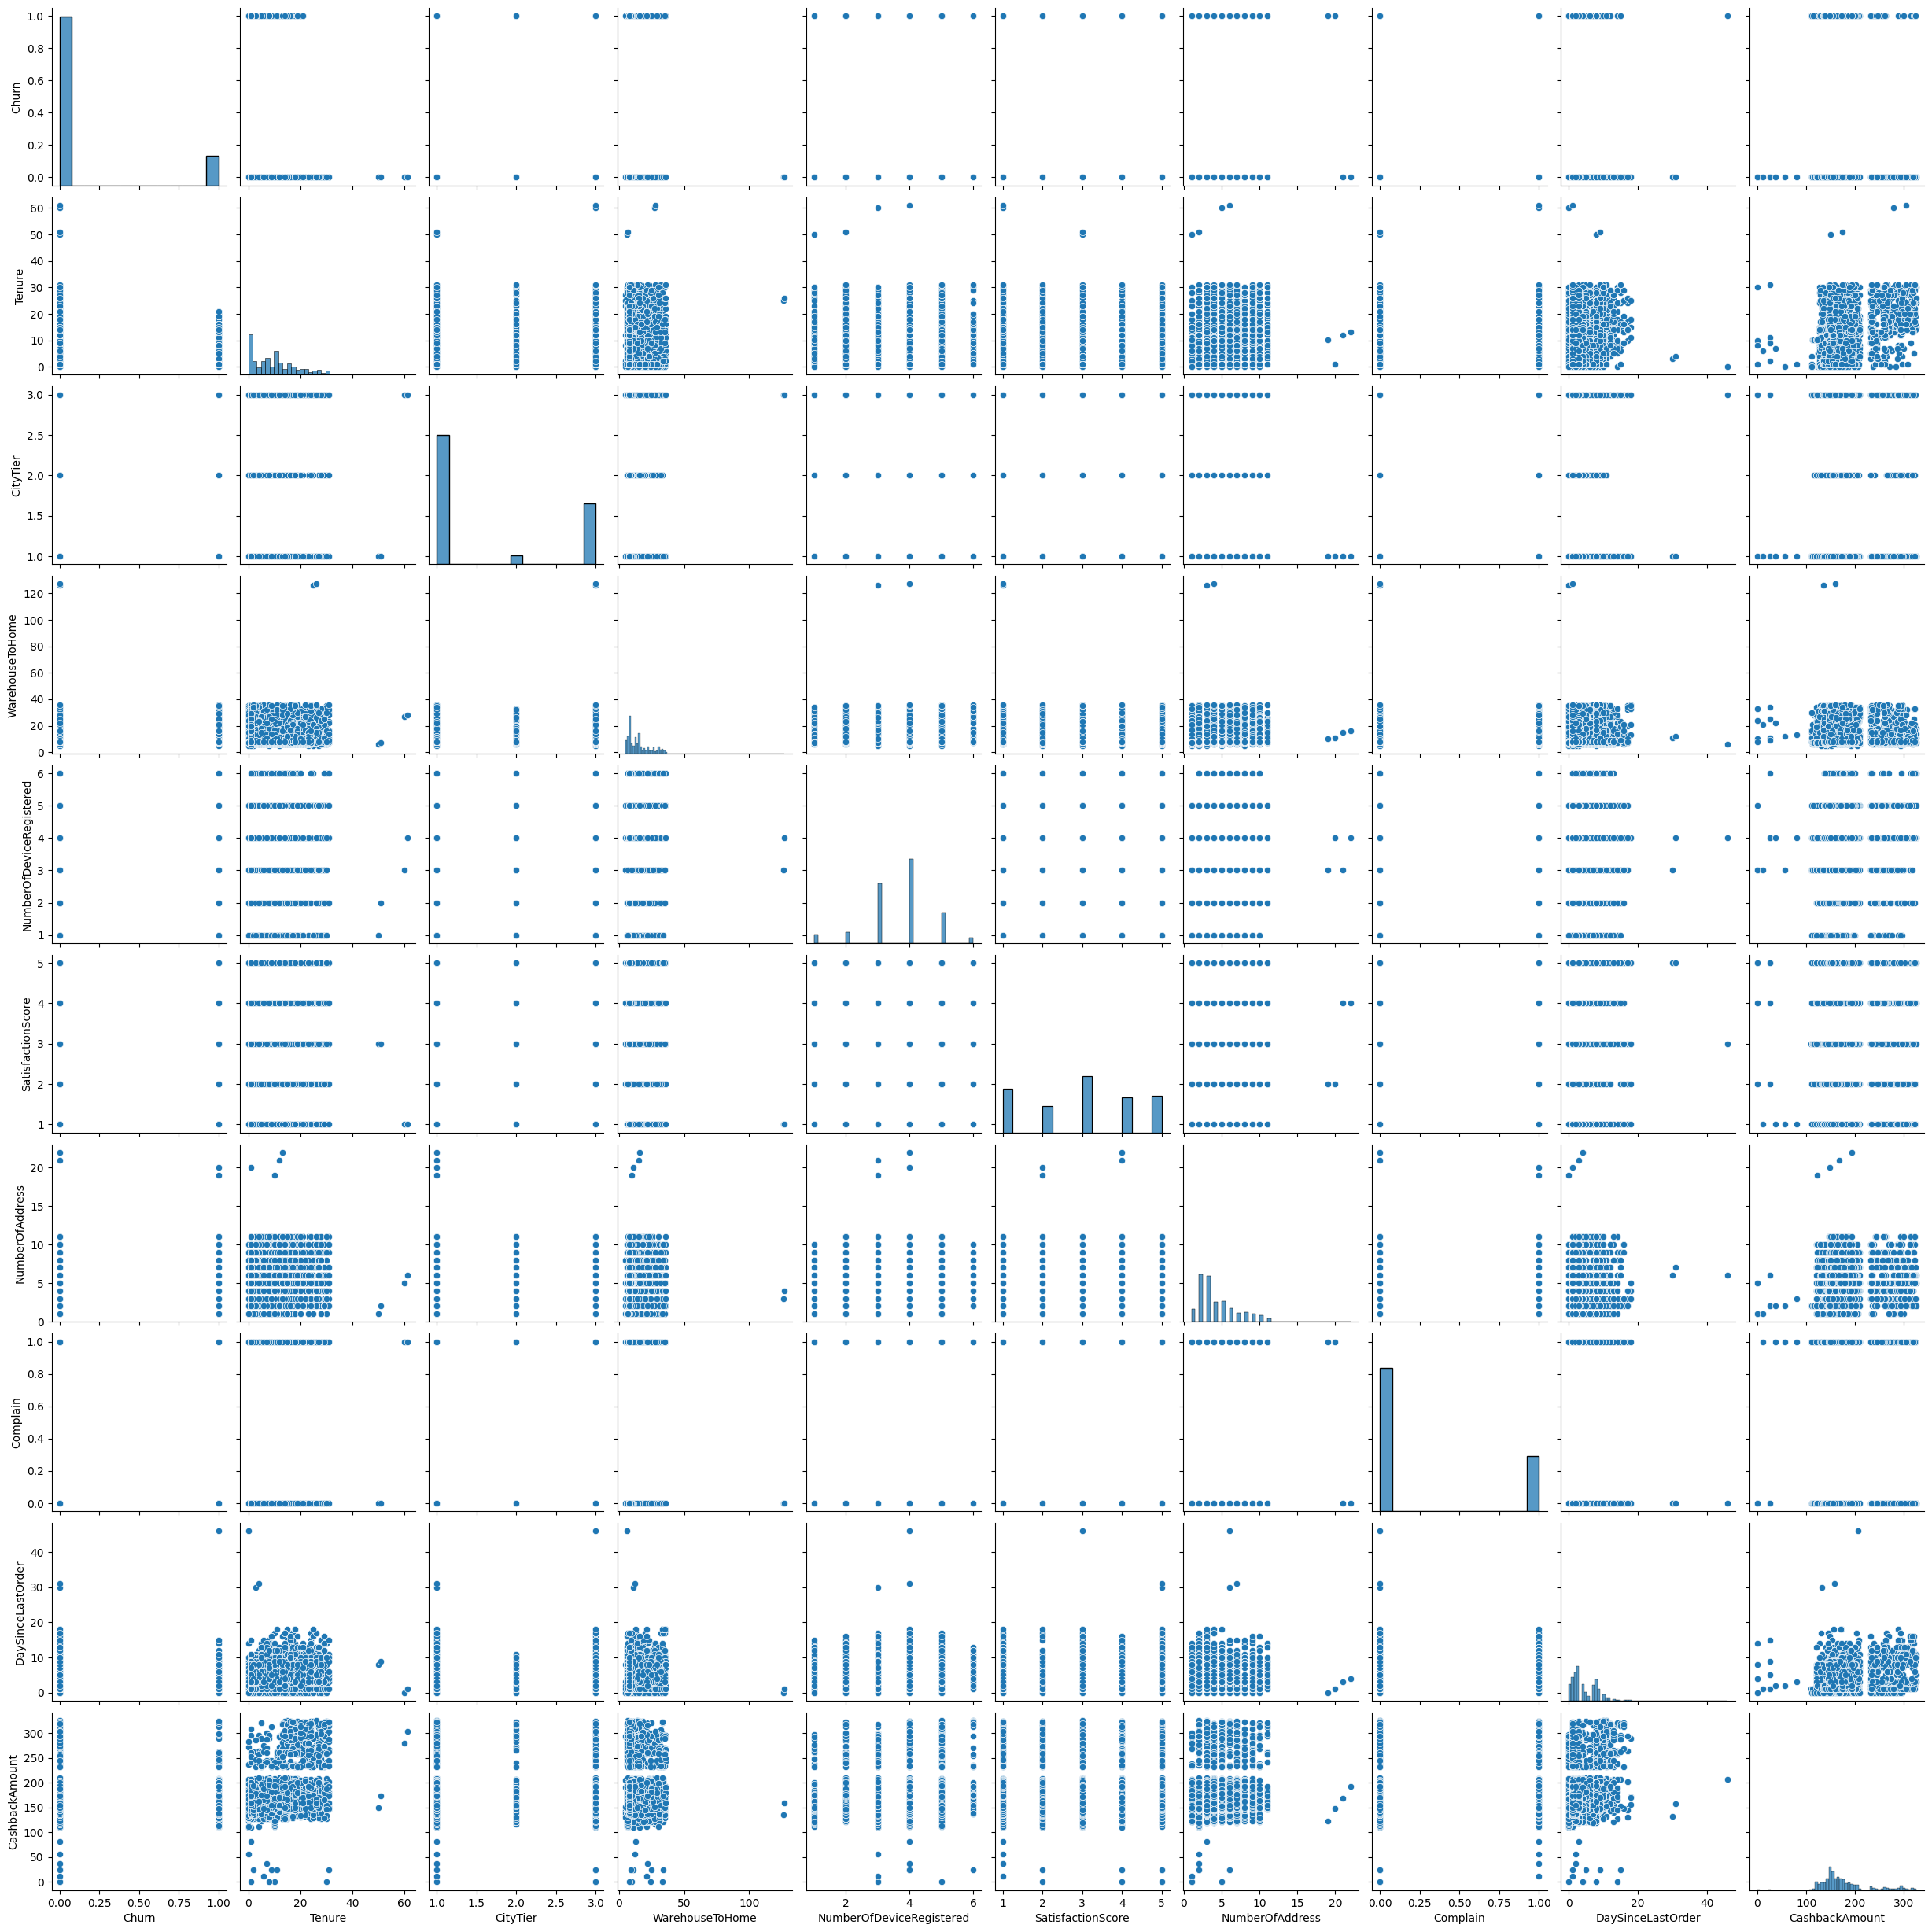

In [ ]:
plt.figure(figsize= (12, 6))
sns.pairplot(df)
plt.show()

### Tenure column analysis

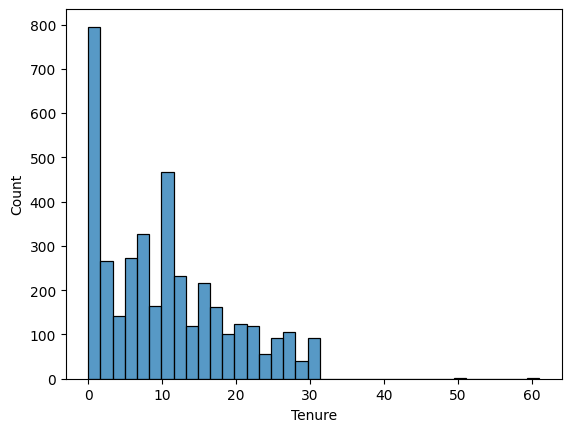

In [ ]:
# analysing 'Tenure' column
sns.histplot(x= df['Tenure'])
plt.show()

In [ ]:
df[df['Tenure'] > 30]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
2847,0,31.0,Mobile Phone,1,16.0,Credit Card,Female,5,Mobile Phone,4,Divorced,6,1,1.0,158.46
2915,0,31.0,Phone,1,10.0,Debit Card,Male,5,Mobile Phone,2,Divorced,5,0,1.0,146.77
2922,0,31.0,Phone,2,13.0,Credit Card,Male,4,Mobile Phone,3,Divorced,10,0,3.0,147.67
2998,0,31.0,Computer,1,7.0,Debit Card,Male,6,Laptop & Accessory,3,Married,4,1,3.0,181.60
3050,0,31.0,Mobile Phone,1,7.0,Credit Card,Male,4,Laptop & Accessory,3,Divorced,4,0,3.0,192.55
3101,0,31.0,Mobile Phone,1,14.0,Debit Card,Female,4,Others,5,Divorced,7,0,11.0,320.66
3114,0,31.0,Mobile Phone,3,36.0,E wallet,Male,5,Grocery,2,Married,5,0,1.0,266.18
3226,0,31.0,Mobile Phone,3,23.0,E wallet,Male,4,Laptop & Accessory,5,Single,10,0,3.0,179.05
3433,0,31.0,Mobile Phone,1,9.0,Debit Card,Female,5,Grocery,2,Single,5,1,4.0,262.26
3448,0,31.0,Mobile Phone,3,7.0,Cash on Delivery,Male,4,Fashion,2,Divorced,5,1,5.0,244.04


In [ ]:
# fixing outliers in 'Tenure' column
df = df[df['Tenure'] < 32]

NameError: name 'df' is not defined

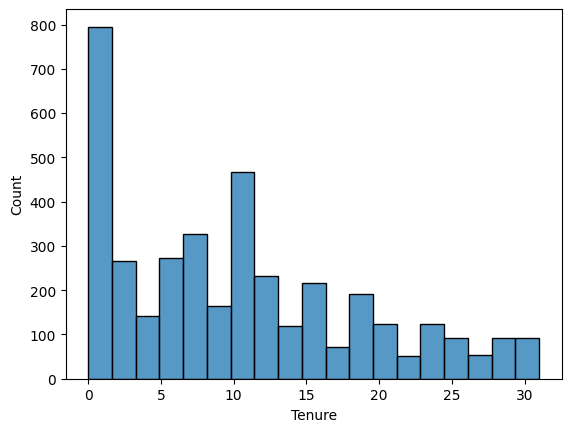

In [ ]:
# ploting again
sns.histplot(x= df['Tenure'])
plt.show()

### WarehouseToHome column analysis

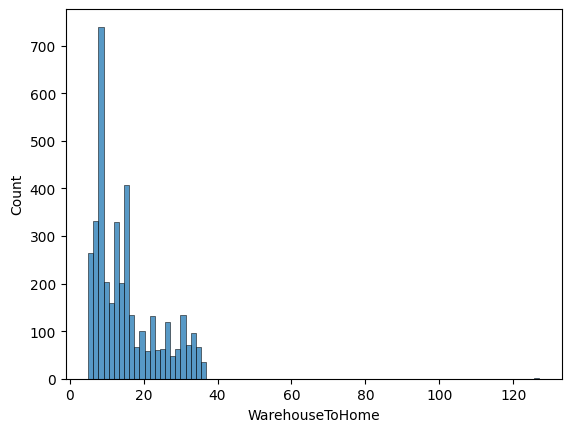

In [ ]:
# visualization
sns.histplot(x= df['WarehouseToHome'])
plt.show()

In [ ]:
df[df['WarehouseToHome'] > 35]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
1309,0,25.0,Computer,3,126.0,Debit Card,Male,3,Mobile,1,Married,3,0,0.0,134.82
2889,0,12.0,Mobile Phone,1,36.0,COD,Male,4,Laptop & Accessory,2,Divorced,5,0,8.0,187.61
2894,1,2.0,Mobile Phone,1,36.0,Credit Card,Male,4,Laptop & Accessory,5,Divorced,9,1,1.0,191.73
2949,1,1.0,Computer,1,36.0,Credit Card,Male,5,Mobile Phone,4,Single,2,0,5.0,159.79
2961,1,11.0,Computer,1,36.0,Debit Card,Male,4,Fashion,4,Divorced,3,1,10.0,243.49
3042,0,22.0,Mobile Phone,3,36.0,Credit Card,Female,4,Fashion,3,Divorced,5,0,1.0,250.04
3099,0,16.0,Computer,1,36.0,Debit Card,Female,4,Laptop & Accessory,3,Married,4,0,3.0,170.56
3114,0,31.0,Mobile Phone,3,36.0,E wallet,Male,5,Grocery,2,Married,5,0,1.0,266.18
3115,0,24.0,Mobile Phone,1,36.0,Debit Card,Male,5,Grocery,3,Divorced,2,0,8.0,295.46
3150,0,1.0,Mobile Phone,3,36.0,Credit Card,Male,4,Laptop & Accessory,3,Married,7,0,1.0,168.06


In [ ]:
# fixing the outliers
df = df[df['WarehouseToHome'] < 37]

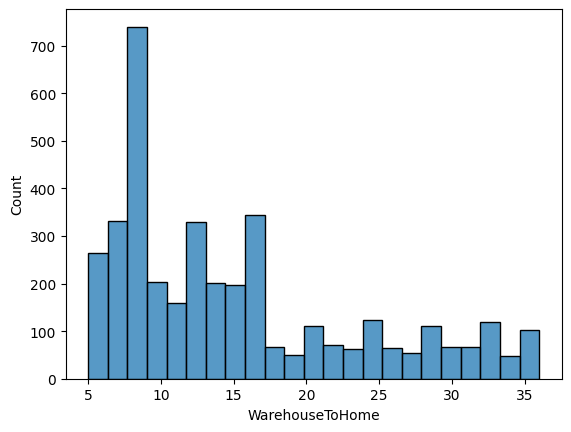

In [ ]:
# visualization again
sns.histplot(x= df['WarehouseToHome'])
plt.show()

### NumberOfAddress column analysis

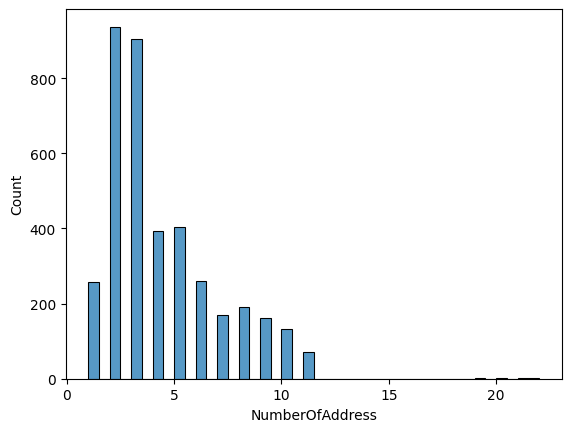

In [ ]:
# visualization
sns.histplot(x= df['NumberOfAddress'])
plt.show()

In [ ]:
df[df['NumberOfAddress'] > 12]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
260,1,10.213917,Computer,1,10.0,COD,Male,3,Mobile,2,Single,19,1,0.0,122.85
691,0,12.000000,Computer,1,15.0,Debit Card,Male,3,Laptop & Accessory,4,Single,21,0,3.0,167.82
3075,1,1.000000,Computer,1,11.0,COD,Male,4,Mobile Phone,2,Single,20,1,1.0,147.85
3506,0,13.000000,Computer,1,16.0,Debit Card,Male,4,Laptop & Accessory,4,Single,22,0,4.0,192.82


In [ ]:
# fixing the outliers
df = df[df['NumberOfAddress'] < 13]

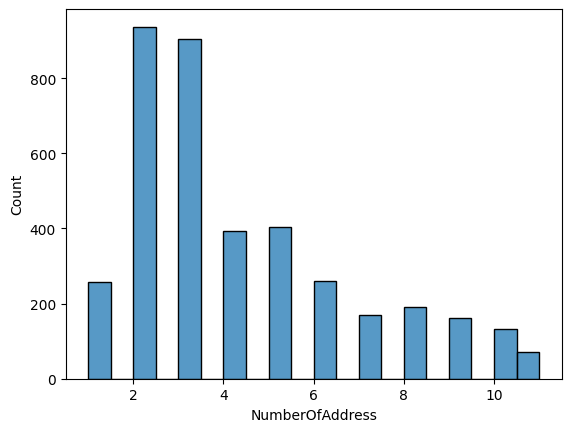

In [ ]:
# visualization again
sns.histplot(x= df['NumberOfAddress'])
plt.show()

### DaySinceLastOrder column analysis

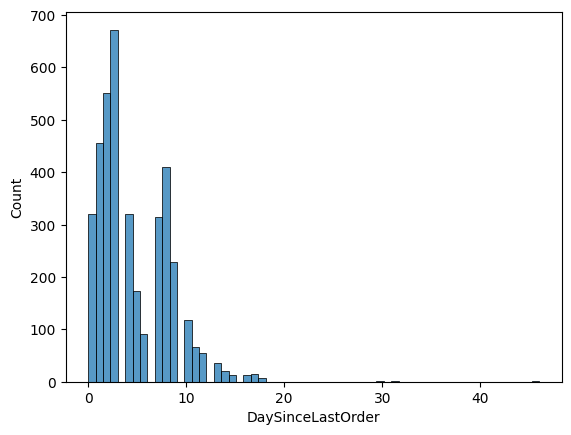

In [ ]:
# visualization
sns.histplot(x= df['DaySinceLastOrder'])
plt.show()

In [ ]:
df[df['DaySinceLastOrder'] > 17]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
1490,0,3.0,Phone,1,11.0,COD,Female,3,Mobile,5,Married,6,0,30.0,132.04
2040,1,0.0,Mobile Phone,3,6.0,Debit Card,Male,4,Fashion,3,Married,6,0,46.0,206.09
3076,0,11.0,Mobile Phone,1,21.0,Debit Card,Female,4,Mobile Phone,5,Married,3,0,18.0,155.34
3306,0,25.0,Mobile Phone,3,33.0,E wallet,Female,4,Grocery,3,Divorced,4,0,18.0,288.07
3376,0,15.0,Mobile Phone,1,13.0,Credit Card,Male,4,Mobile Phone,5,Single,4,1,18.0,172.21
3565,0,18.0,Mobile Phone,1,36.0,UPI,Male,4,Laptop & Accessory,2,Single,3,0,18.0,170.41
3768,0,18.0,Mobile Phone,1,35.0,Debit Card,Male,4,Grocery,5,Divorced,5,0,18.0,288.28
4305,0,4.0,Mobile Phone,1,12.0,COD,Female,4,Mobile Phone,5,Married,7,0,31.0,157.04
4776,0,25.0,Mobile Phone,3,33.0,E wallet,Female,4,Grocery,3,Married,4,0,18.0,288.07
5035,0,18.0,Mobile Phone,1,36.0,UPI,Male,4,Laptop & Accessory,1,Single,3,0,18.0,170.41


In [ ]:
# fixing the outliers
df = df[df['DaySinceLastOrder'] < 19]

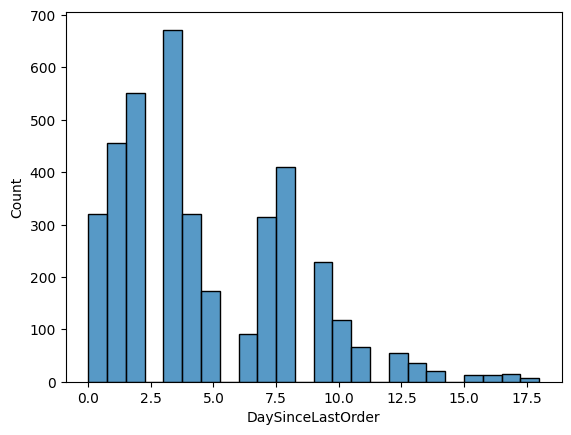

In [ ]:
# visualization again
sns.histplot(x= df['DaySinceLastOrder'])
plt.show()

### CashbackAmount column analysis

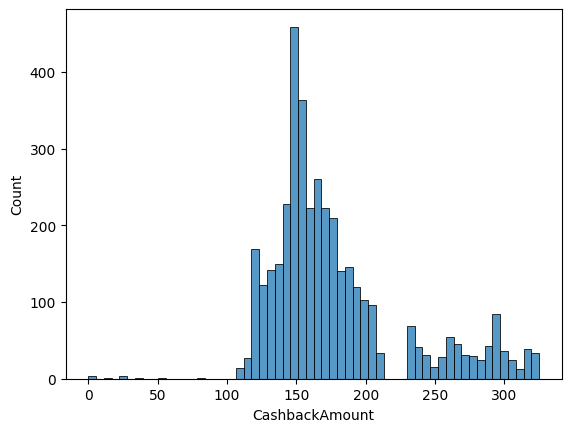

In [ ]:
# visualization
sns.histplot(x= df['CashbackAmount'])
plt.show()

In [ ]:
df[df['CashbackAmount'] < 100]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
101,0,10.0,Computer,3,10.0,E wallet,Male,3,Mobile Phone,2,Married,5,0,8.0,0.0
1026,0,1.0,Mobile Phone,1,33.0,Credit Card,Female,5,Laptop & Accessory,5,Married,1,0,0.0,0.0
1176,0,30.0,Computer,3,8.0,Credit Card,Male,3,Grocery,4,Married,5,0,14.0,0.0
1255,0,8.0,Mobile Phone,3,24.0,Credit Card,Male,3,Laptop & Accessory,5,Married,1,0,4.0,0.0
1300,0,6.0,Mobile Phone,1,21.0,Credit Card,Female,3,Laptop & Accessory,1,Married,1,1,1.0,12.0
1850,0,0.0,Mobile Phone,1,12.0,Debit Card,Female,3,Mobile Phone,1,Married,2,1,2.0,56.0
2916,0,11.0,Computer,3,11.0,E wallet,Male,4,Mobile Phone,2,Married,6,0,9.0,25.0
3841,0,2.0,Mobile Phone,1,34.0,Credit Card,Female,6,Laptop & Accessory,5,Married,2,0,1.0,25.0
3991,0,31.0,Computer,3,9.0,Credit Card,Male,4,Grocery,4,Married,6,0,15.0,25.0
4070,0,9.0,Mobile Phone,3,25.0,Credit Card,Male,4,Laptop & Accessory,5,Married,2,0,5.0,25.0


In [ ]:
len(df[df['CashbackAmount'] < 100])

12

In [ ]:
# droping the outliers
df = df[df['CashbackAmount'] >= 100]

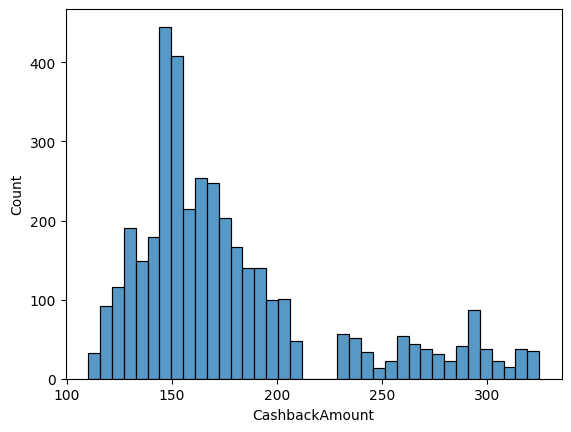

In [ ]:
# visualization again
sns.histplot(x= df['CashbackAmount'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3869 entries, 0 to 5618
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     3869 non-null   int64  
 1   Tenure                    3869 non-null   float64
 2   PreferredLoginDevice      3869 non-null   object 
 3   CityTier                  3869 non-null   int64  
 4   WarehouseToHome           3869 non-null   float64
 5   PreferredPaymentMode      3869 non-null   object 
 6   Gender                    3869 non-null   object 
 7   NumberOfDeviceRegistered  3869 non-null   int64  
 8   PreferedOrderCat          3869 non-null   object 
 9   SatisfactionScore         3869 non-null   int64  
 10  MaritalStatus             3869 non-null   object 
 11  NumberOfAddress           3869 non-null   int64  
 12  Complain                  3869 non-null   int64  
 13  DaySinceLastOrder         3869 non-null   float64
 14  CashbackAmoun

In [ ]:
print('We have removed', 3894 - 3869, 'outliers successfully!')
print('They may couse our future models negatively.')

We have removed 25 outliers successfully!
They may couse our future models negatively.


# Preprocessing for ML

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3869 entries, 0 to 5618
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     3869 non-null   int64  
 1   Tenure                    3869 non-null   float64
 2   PreferredLoginDevice      3869 non-null   object 
 3   CityTier                  3869 non-null   int64  
 4   WarehouseToHome           3869 non-null   float64
 5   PreferredPaymentMode      3869 non-null   object 
 6   Gender                    3869 non-null   object 
 7   NumberOfDeviceRegistered  3869 non-null   int64  
 8   PreferedOrderCat          3869 non-null   object 
 9   SatisfactionScore         3869 non-null   int64  
 10  MaritalStatus             3869 non-null   object 
 11  NumberOfAddress           3869 non-null   int64  
 12  Complain                  3869 non-null   int64  
 13  DaySinceLastOrder         3869 non-null   float64
 14  CashbackAmoun

In [ ]:
# feature and label extraction
X = df.drop('Churn', axis= 1)
y = df[['Churn']].copy().values

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 78)

In [ ]:
# categorizing columns: numeric and categoric.
num_cols = X.select_dtypes(include= ['int64', 'float64']).columns
cat_cols = X.select_dtypes(include= ['object']).columns

In [ ]:
# transformers
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(sparse_output= False)

# creating a pipeline for preprocessing: scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [ ]:
# preprocessing the data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.fit_transform(X_test)

In [ ]:
X_train_prepared[1, :]

array([ 0.29529155,  1.45781879, -0.74387112, -1.66531577,  0.01092762,
       -0.8753083 , -0.62347249,  0.97074249,  0.51426835,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

# Model development

## 1. Logistic Regression

In [ ]:
LR_model = LogisticRegression(random_state= 78)

# training
LR_model.fit(X_train_prepared, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=78)

In [ ]:
# prediction
y_pred = LR_model.predict(X_test_prepared)

In [ ]:
# evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       976
           1       0.79      0.48      0.59       185

    accuracy                           0.90      1161
   macro avg       0.85      0.73      0.77      1161
weighted avg       0.89      0.90      0.89      1161



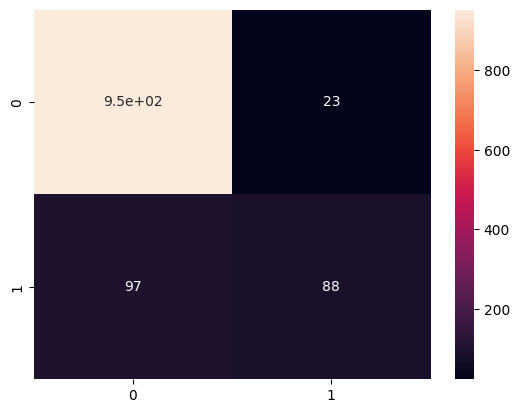

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.show()

## 2. Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier(random_state= 78)

# training
tree_model.fit(X_train_prepared, y_train)

DecisionTreeClassifier(random_state=78)

In [ ]:
# prediction
y_pred = tree_model.predict(X_test_prepared)

In [ ]:
# evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       976
           1       0.72      0.77      0.74       185

    accuracy                           0.91      1161
   macro avg       0.84      0.86      0.85      1161
weighted avg       0.92      0.91      0.92      1161



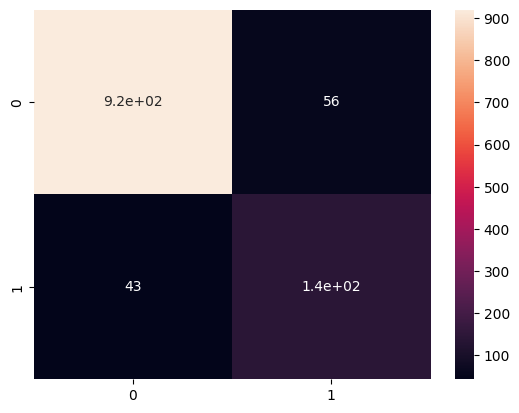

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.show()

## 3. Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators= 130, max_depth= 15, random_state= 78)

# training
rf_model.fit(X_train_prepared, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=15, n_estimators=130, random_state=78)

In [ ]:
# prediction
y_pred = rf_model.predict(X_test_prepared)

In [ ]:
# evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       976
           1       0.92      0.65      0.77       185

    accuracy                           0.94      1161
   macro avg       0.93      0.82      0.86      1161
weighted avg       0.94      0.94      0.93      1161



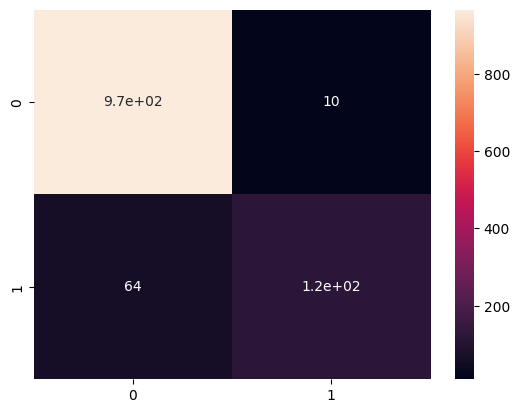

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.show()

## 4. SVM (Support Vector Machine)

In [ ]:
svm_model = SVC(random_state= 78)

# training
svm_model.fit(X_train_prepared, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=78)

In [ ]:
# predicting
y_pred = svm_model.predict(X_test_prepared)

In [ ]:
# evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       976
           1       0.90      0.44      0.59       185

    accuracy                           0.90      1161
   macro avg       0.90      0.71      0.77      1161
weighted avg       0.90      0.90      0.89      1161



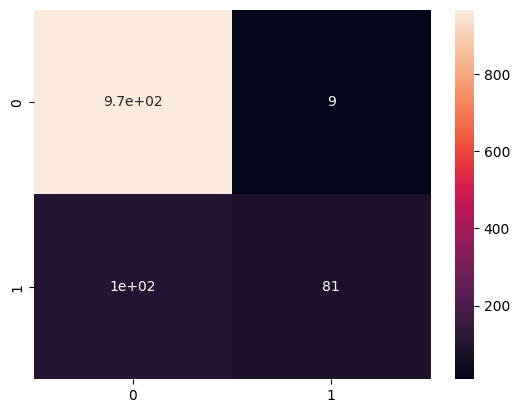

In [ ]:
# confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.show()

### SVM2

In [ ]:
# tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'class_weight': [None, 'balanced']
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=auto, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=auto, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=auto, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=auto, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=auto, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END C=0.1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ...C=0.1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.3s
[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=0.1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=None, gamma=scale, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=None, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .C=1, class_weight=None, gamma=scale, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=None, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .C=1, class_weight=None, gamma=scale, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=None, gamma=auto, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=1, class_weight=None, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ..C=1, class_weight=None, gamma=auto, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=1, class_weight=None, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ..C=1, class_weight=None, gamma=auto, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=1, class_weight=None, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .C=1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .C=1, class_weight=None, gamma=0.001, kernel=linear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=1, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.3s
[CV] END C=1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=1, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=scale, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=scale, kernel=linear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=scale, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=scale, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ...C=10, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=10, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...C=10, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=10, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...C=10, class_weight=None, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=auto, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=auto, kernel=linear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=auto, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=auto, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=auto, kernel=linear; total time=   0.5s
[CV] END ....C=10, class_weight=None, gamma=auto, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END ....C=10, class_weight=None, gamma=auto, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, class_weight=None, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ....C=10, class_weight=None, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=0.01, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=0.01, kernel=linear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=0.01, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=0.01, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .C=10, class_weight=None, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ....C=10, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....C=10, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....C=10, class_weight=None, gamma=0.01, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=None, gamma=0.001, kernel=linear; total time=   0.8s
[CV] END ...C=10, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=10, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ...C=10, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=10, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ...C=10, class_weight=None, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=scale, kernel=linear; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.7s
[CV] END C=10, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END C=10, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END C=10, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=linear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=linear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto', 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9283580358908949


In [ ]:
svm2 = SVC(C= 10, class_weight= None, gamma= 'scale', kernel= 'rbf', random_state= 78)

# training
svm2.fit(X_train_prepared, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, random_state=78)

In [ ]:
# predicting
y_pred = svm2.predict(X_test_prepared)

In [ ]:
# evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       976
           1       0.89      0.70      0.79       185

    accuracy                           0.94      1161
   macro avg       0.92      0.84      0.87      1161
weighted avg       0.94      0.94      0.94      1161



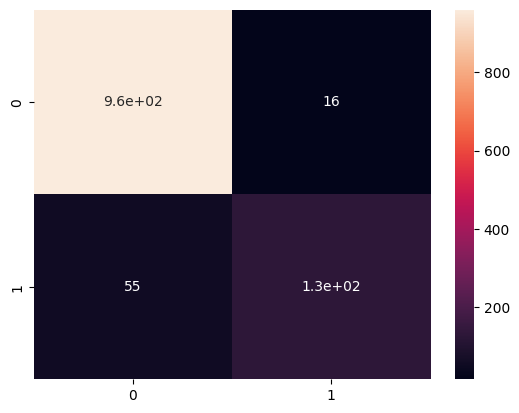

In [ ]:
# confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.show()

## XGBoost

In [ ]:
xgb_model = XGBClassifier(use_label_encoder= False, eval_metrics= 'logloss')

# train
xgb_model.fit(X_train_prepared, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:37:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [ ]:
# predict
y_pred = xgb_model.predict(X_test_prepared)

In [ ]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       976
           1       0.85      0.74      0.79       185

    accuracy                           0.94      1161
   macro avg       0.90      0.86      0.88      1161
weighted avg       0.93      0.94      0.94      1161



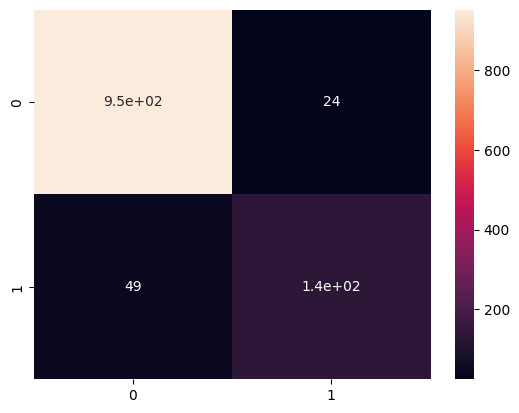

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.show()

In [ ]:
# tune
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:47:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.7, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.9320494369453861


## XGB model2

In [ ]:
xgb2 = XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.2, max_depth= 7, n_estimators= 100, subsample= 1.0, use_label_encoder= False, eval_metrics= 'logloss')

# train
xgb2.fit(X_train_prepared, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:50:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [ ]:
# predict
y_pred = xgb2.predict(X_test_prepared)

In [ ]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       976
           1       0.88      0.72      0.80       185

    accuracy                           0.94      1161
   macro avg       0.92      0.85      0.88      1161
weighted avg       0.94      0.94      0.94      1161



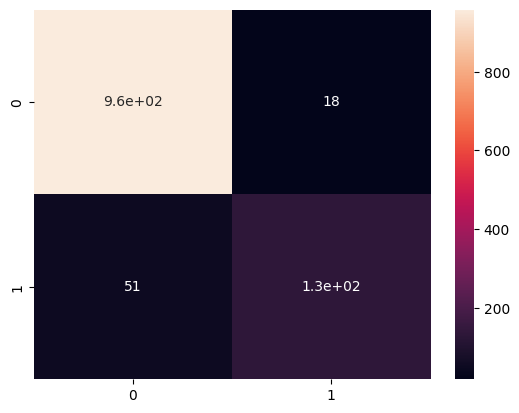

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.show()